In [1]:
from prophet import Prophet
import pandas as pd

In [2]:
df = pd.read_excel('Excel Sample_BA _GIVA (1).xlsx',sheet_name='App Data',header=1)
df.head()

,Unnamed: 0,Date,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
0,NaN,2021-09-01,6012,715,2538,4738,0.422156,13421,4098,0.305342,1316,0.098055,0.321132,460,0.034275
1,NaN,2021-09-02,9327,617,2364,5725,0.253458,15858,5068,0.319586,1313,0.082797,0.259077,521,0.032854
2,NaN,2021-09-03,10415,786,1552,6222,0.149016,15832,4669,0.294909,1214,0.076680,0.260013,311,0.019644
3,NaN,2021-09-04,12312,765,2736,6258,0.222222,17144,5023,0.292989,1328,0.077462,0.264384,435,0.025373
4,NaN,2021-09-05,15719,944,3288,5532,0.209174,18753,4599,0.245241,1393,0.074281,0.302892,438,0.023356


In [3]:
#Remove the unnamed index column
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
data=df[['Date','Order Comp']]

In [5]:
data.head()

,Date,Order Comp
0,2021-09-01,460
1,2021-09-02,521
2,2021-09-03,311
3,2021-09-04,435
4,2021-09-05,438


In [6]:
data['closure']=data['Order Comp']
data.head()

C:\Users\sony\AppData\Local\Temp\ipykernel_16468\48490291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['closure']=data['Order Comp']


,Date,Order Comp,closure
0,2021-09-01,460,460
1,2021-09-02,521,521
2,2021-09-03,311,311
3,2021-09-04,435,435
4,2021-09-05,438,438


In [7]:
df1=data.drop('Order Comp', axis=1)


In [8]:
df1.head()

,Date,closure
0,2021-09-01,460
1,2021-09-02,521
2,2021-09-03,311
3,2021-09-04,435
4,2021-09-05,438


In [9]:
df1.columns = ['ds','y']

In [10]:
df1.head()

,ds,y
0,2021-09-01,460
1,2021-09-02,521
2,2021-09-03,311
3,2021-09-04,435
4,2021-09-05,438


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      112 non-null    datetime64[ns]
 1   y       112 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


<Axes: xlabel='ds'>

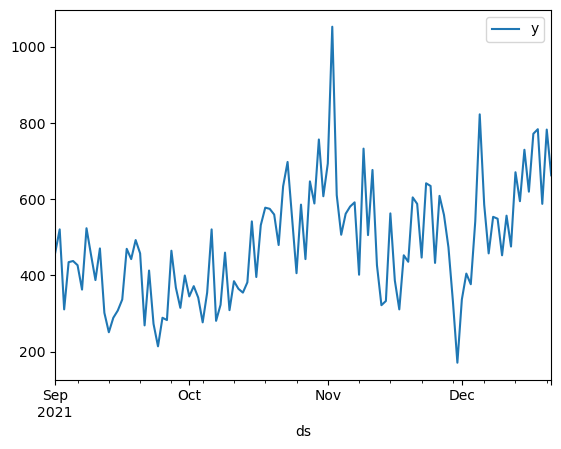

In [12]:
df1.plot(x='ds',y='y')

In [13]:
len(df)

112

In [14]:
size = int(len(df1)*0.8)

In [17]:
train = df1.iloc[:size]

In [18]:
test = df1.iloc[size:]

In [97]:
m = Prophet()
m.fit(train)
future=m.make_future_dataframe(periods=33)
forecast = m.predict(future)

00:14:09 - cmdstanpy - INFO - Chain [1] start processing
00:14:09 - cmdstanpy - INFO - Chain [1] done processing


In [98]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
117,2021-12-27,647.479146,478.912430,788.004572,647.473527,647.484491,-16.134724,-16.134724,-16.134724,-16.134724,-16.134724,-16.134724,0.0,0.0,0.0,631.344422
118,2021-12-28,649.999234,519.699238,835.596402,649.993255,650.004948,34.032761,34.032761,34.032761,34.032761,34.032761,34.032761,0.0,0.0,0.0,684.031994
119,2021-12-29,652.519321,487.356938,811.272893,652.513024,652.525304,0.191270,0.191270,0.191270,0.191270,0.191270,0.191270,0.0,0.0,0.0,652.710591
120,2021-12-30,655.039408,496.870167,804.145014,655.032833,655.045657,-11.251536,-11.251536,-11.251536,-11.251536,-11.251536,-11.251536,0.0,0.0,0.0,643.787872
121,2021-12-31,657.559495,497.469843,808.345308,657.552633,657.566075,-13.460007,-13.460007,-13.460007,-13.460007,-13.460007,-13.460007,0.0,0.0,0.0,644.099488


In [32]:
from statsmodels.tools.eval_measures import rmse

<Axes: xlabel='ds'>

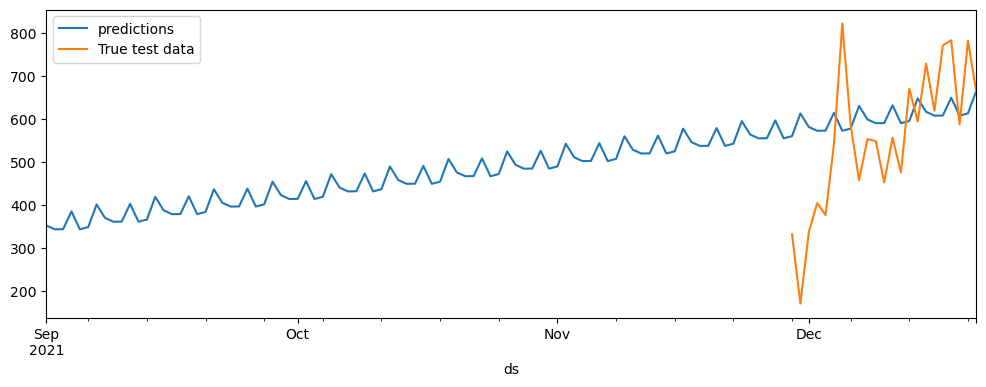

In [93]:
ax = forecast.plot(x='ds',y='yhat',label='predictions',legend=True,figsize=(12,4))
test.plot(x='ds',y='y',label='True test data',legend=True,ax=ax)

In [33]:
pred = forecast.iloc[-12:]['yhat']

In [34]:
pred

100    591.177659
101    632.580036
102    590.877792
103    596.063203
104    648.750775
105    617.429372
106    608.506653
107    608.818269
108    650.220646
109    608.518401
110    613.703812
111    666.391385
Name: yhat, dtype: float64

In [35]:
test['y']

89     332
90     171
91     337
92     405
93     377
94     542
95     823
96     586
97     458
98     554
99     549
100    453
101    557
102    476
103    671
104    595
105    730
106    620
107    772
108    784
109    588
110    783
111    663
Name: y, dtype: int64

In [38]:
test.mean()

ds    2021-12-10 00:00:00
y              557.652174
dtype: object

In [40]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [85]:
#initial
initial=30
initial = str(initial)+'days'
initial

'30days'

In [86]:
#period
period = 7
period = str(period) + 'days'
period

'7days'

In [87]:
#horizon
horizon=30
horizon = str(horizon)+'days'

In [88]:
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)



  0%|          | 0/5 [00:00<?, ?it/s]

21:13:28 - cmdstanpy - INFO - Chain [1] start processing
21:13:28 - cmdstanpy - INFO - Chain [1] done processing
21:13:28 - cmdstanpy - INFO - Chain [1] start processing
21:13:28 - cmdstanpy - INFO - Chain [1] done processing
21:13:28 - cmdstanpy - INFO - Chain [1] start processing
21:13:29 - cmdstanpy - INFO - Chain [1] done processing
21:13:29 - cmdstanpy - INFO - Chain [1] start processing
21:13:29 - cmdstanpy - INFO - Chain [1] done processing
21:13:30 - cmdstanpy - INFO - Chain [1] start processing
21:13:30 - cmdstanpy - INFO - Chain [1] done processing


In [89]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
145,2021-11-24,587.912470,463.194728,714.819533,635,2021-10-29
146,2021-11-25,574.257187,452.805371,699.315876,433,2021-10-29
147,2021-11-26,578.710081,457.220148,713.247608,609,2021-10-29
148,2021-11-27,609.893503,482.234570,738.803803,559,2021-10-29
149,2021-11-28,570.783623,444.925683,693.999114,474,2021-10-29


In [90]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,19300.013003,138.924487,110.856253,0.200404,0.223156,0.227963,0.533333
1,4 days,40421.518555,201.051035,149.375554,0.255756,0.238782,0.303106,0.533333
2,5 days,40811.727730,202.019127,150.891156,0.258102,0.253115,0.306056,0.533333
3,6 days,38492.680483,196.195516,141.603043,0.242197,0.253115,0.288747,0.533333
4,7 days,20748.534627,144.043516,114.268022,0.215401,0.169666,0.253468,0.533333
5,8 days,29759.389734,172.509100,137.106703,0.243166,0.232534,0.291072,0.466667
6,9 days,34379.709134,185.417661,153.819307,0.265247,0.276910,0.324277,0.400000
7,10 days,32614.003047,180.593475,151.402797,0.265659,0.276910,0.316293,0.466667
8,11 days,61545.840976,248.084342,201.188765,0.328624,0.336148,0.409222,0.333333
9,12 days,56990.000732,238.725786,186.092416,0.305220,0.314372,0.376068,0.400000


C:\Users\sony\anaconda3\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\sony\anaconda3\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


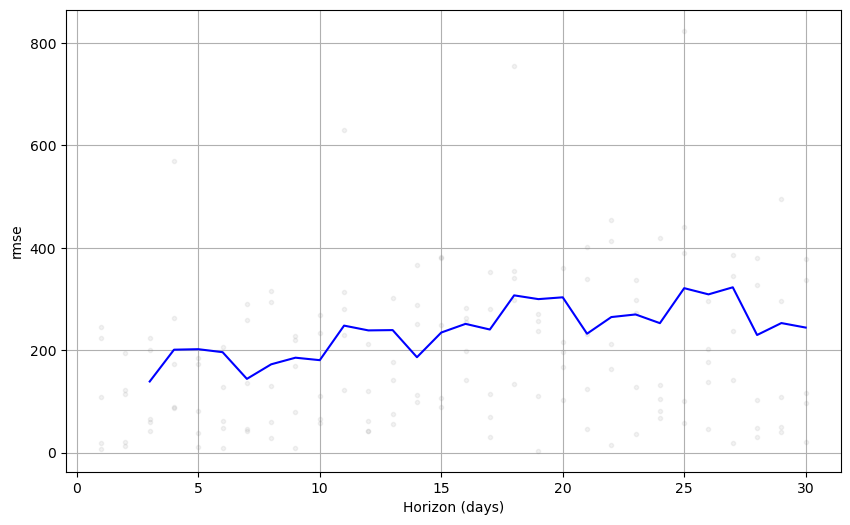

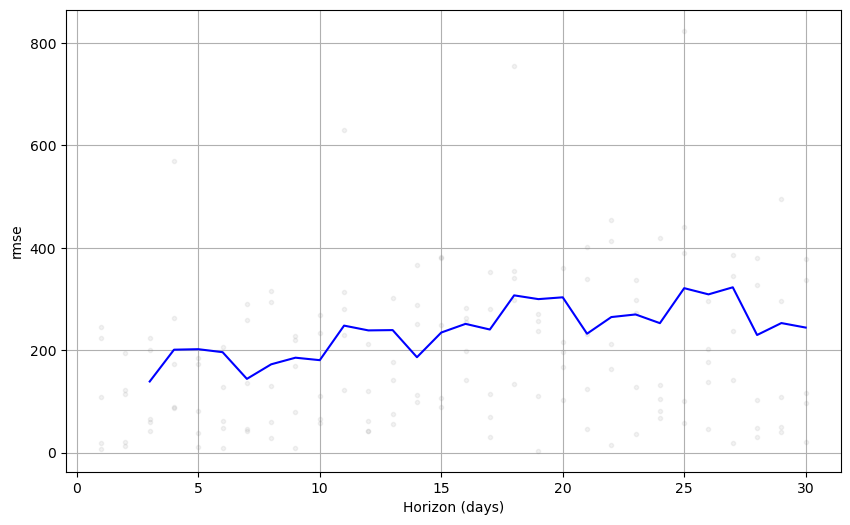

In [92]:
plot_cross_validation_metric(df_cv,metric='rmse')